In [ ]:
#Multicollinearity

In [45]:
#Load libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [56]:
df_vif = pd.read_csv('covid_restaurant_full_post_outlier.csv')
df_vif_loc = pd.read_csv('covid_restaurant_full_post_outlier_loc.csv')
df_vif=df_vif.drop(columns=['State_x', 'Area_name'])
df_vif = df_vif.iloc[: , 1:]
df_vif_loc = df_vif_loc.iloc[: , 1:]
df_vif.head(10)

,rating,price,pickup,delivery,restaurant_reservation,total_restaurants_zip,Total_Reviews_Zip,Average_Rating_Zip,Average_Price_Zip,hotdogs,...,covid_low,covid_moderate,covid_substantial,Completeness_pct,SizeRank,zillow_sfh_sale_price,redfin_sale_price,redfin_days_on_market,redfin_homes_sold,is_closed
0,2.5,1,0,0,0,13,703,3.807692,1.615385,0,...,0,1,0,96.9,388,335737,363211,39,4780,1
1,1.5,1,0,1,0,68,5612,3.169118,1.514706,1,...,0,0,1,97.7,3,461902,472842,26,124537,0
2,3.0,1,0,0,0,115,14069,3.508696,1.704348,0,...,0,1,0,96.9,48,393949,386701,30,27870,1
3,3.0,1,0,0,0,195,28703,3.784615,1.558974,0,...,0,1,0,96.9,48,393949,386701,30,27870,1
4,4.0,1,0,0,0,356,39868,3.737360,1.693820,0,...,0,0,1,96.9,135,389140,369527,49,8227,1
5,1.5,2,0,0,0,76,7888,3.664474,1.605263,0,...,0,1,0,98.6,28,190756,167109,31,21865,1
6,4.0,1,0,0,0,43,1374,3.546512,1.465116,0,...,0,1,0,98.6,28,190756,167109,31,21865,1
7,4.0,1,0,0,0,143,14177,3.325175,1.454545,0,...,0,0,1,97.7,3,461902,472842,26,124537,1
8,3.5,2,0,0,0,108,5466,3.370370,1.722222,0,...,0,1,0,94.7,179,203957,170770,63,4602,1
9,4.0,2,0,0,0,73,10137,3.301370,1.671233,0,...,0,0,1,97.7,3,461902,472842,26,124537,1


In [14]:
X = df_vif.iloc[:,:-1]
X = X.dropna()

In [15]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data.sort_values(by=['VIF'], ascending=False))

                                      feature           VIF
49                             covid_moderate  44751.646628
50                          covid_substantial  29925.590003
47                                 covid_high   1326.360886
48                                  covid_low    609.880781
54                          redfin_sale_price    560.248164
53                      zillow_sfh_sale_price    552.276054
41            Rural_urban_continuum_code_2013    121.737755
46  Med_HH_Income_Percent_of_State_Total_2019    115.354755
45               Median_Household_Income_2019     83.432969
42                  Urban_influence_code_2013     72.430926
44                     Unemployment_rate_2020     30.445785
56                          redfin_homes_sold     29.931131
55                      redfin_days_on_market     27.263398
51                           Completeness_pct     11.820935
52                                   SizeRank      6.278973
6                           Total_Review

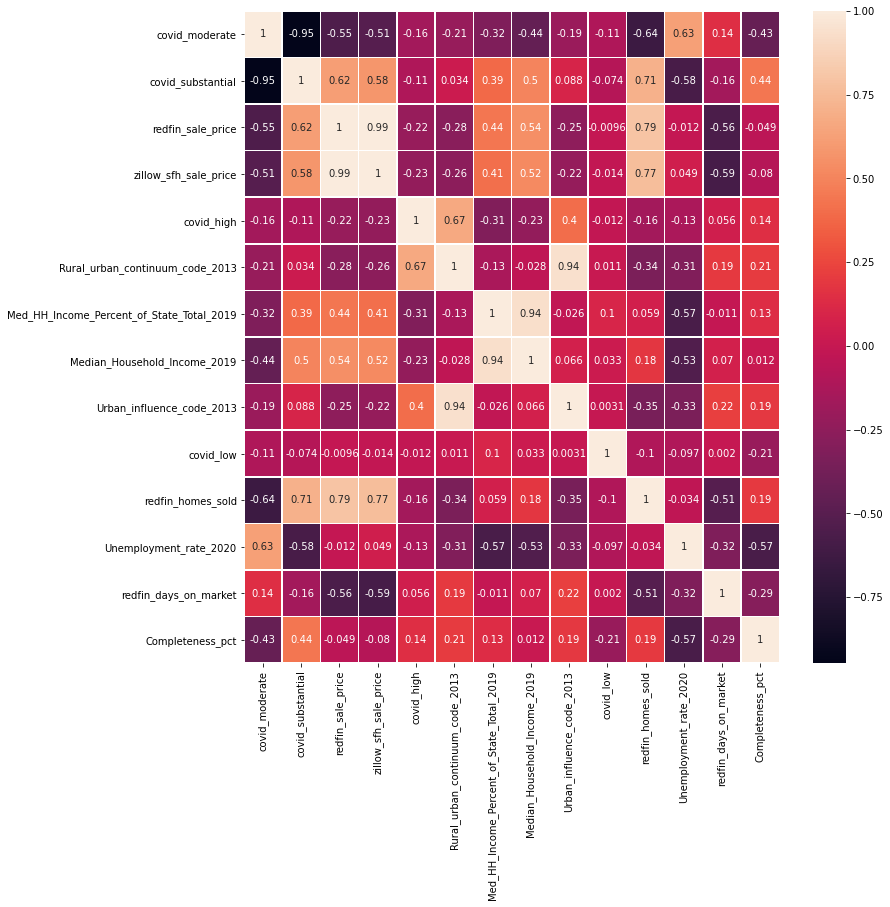

In [18]:
df_inf = X[['covid_moderate', 'covid_substantial', 'redfin_sale_price', 'zillow_sfh_sale_price', 
           'covid_high', 'Rural_urban_continuum_code_2013','Med_HH_Income_Percent_of_State_Total_2019', 'Median_Household_Income_2019',
           'Urban_influence_code_2013','covid_low','redfin_homes_sold', 'Unemployment_rate_2020','redfin_days_on_market', 'Completeness_pct'
           ]]

corrMatrix = df_inf.corr()
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)

In [29]:
#rerun VIF check
df_vif_2=X.drop(columns=['covid_substantial', 'redfin_sale_price','redfin_homes_sold','Urban_influence_code_2013',
                         'Med_HH_Income_Percent_of_State_Total_2019','Median_Household_Income_2019', 'Completeness_pct', 'redfin_days_on_market' 
                        ])

vif_data_2 = pd.DataFrame()
vif_data_2["feature"] = df_vif_2.columns
vif_data_2["VIF"] = [variance_inflation_factor(df_vif_2.values, i) for i in range(len(df_vif_2.columns))]
  
print(vif_data_2.sort_values(by=['VIF'], ascending=False))

                            feature         VIF
42                       Metro_2013  342.321908
7                Average_Rating_Zip  322.152744
8                 Average_Price_Zip  158.549619
43           Unemployment_rate_2020   32.687601
48            zillow_sfh_sale_price   32.472430
0                            rating   24.850640
40                   business_ratio   23.069951
41  Rural_urban_continuum_code_2013   21.091692
1                             price   11.332150
5             total_restaurants_zip   10.657592
46                   covid_moderate   10.014200
6                 Total_Reviews_Zip    6.126882
3                          delivery    3.497980
47                         SizeRank    2.863822
20                             bars    2.207435
44                       covid_high    2.046847
2                            pickup    1.975162
9                           hotdogs    1.690356
24                       sportsbars    1.573639
10                            pizza    1

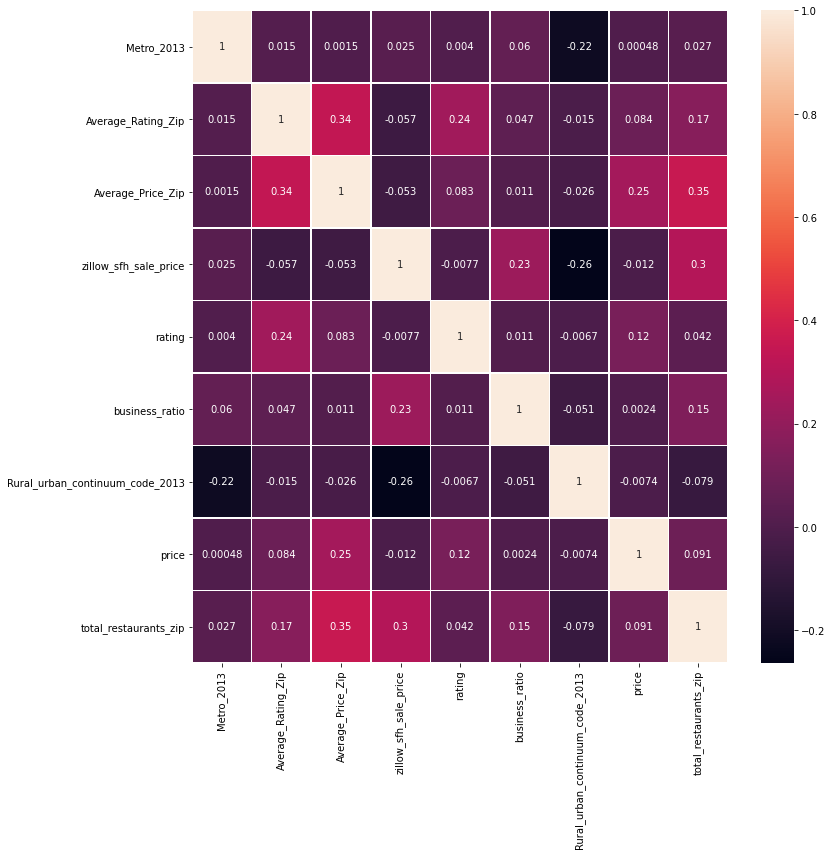

In [30]:
df_inf2 = df_vif_2[['Metro_2013', 'Average_Rating_Zip', 'Average_Price_Zip', 'zillow_sfh_sale_price', "rating", "business_ratio",
                   "Rural_urban_continuum_code_2013", "price", "total_restaurants_zip"
           ]]

corrMatrix2 = df_inf2.corr()
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corrMatrix2, annot=True, linewidths=.5, ax=ax)

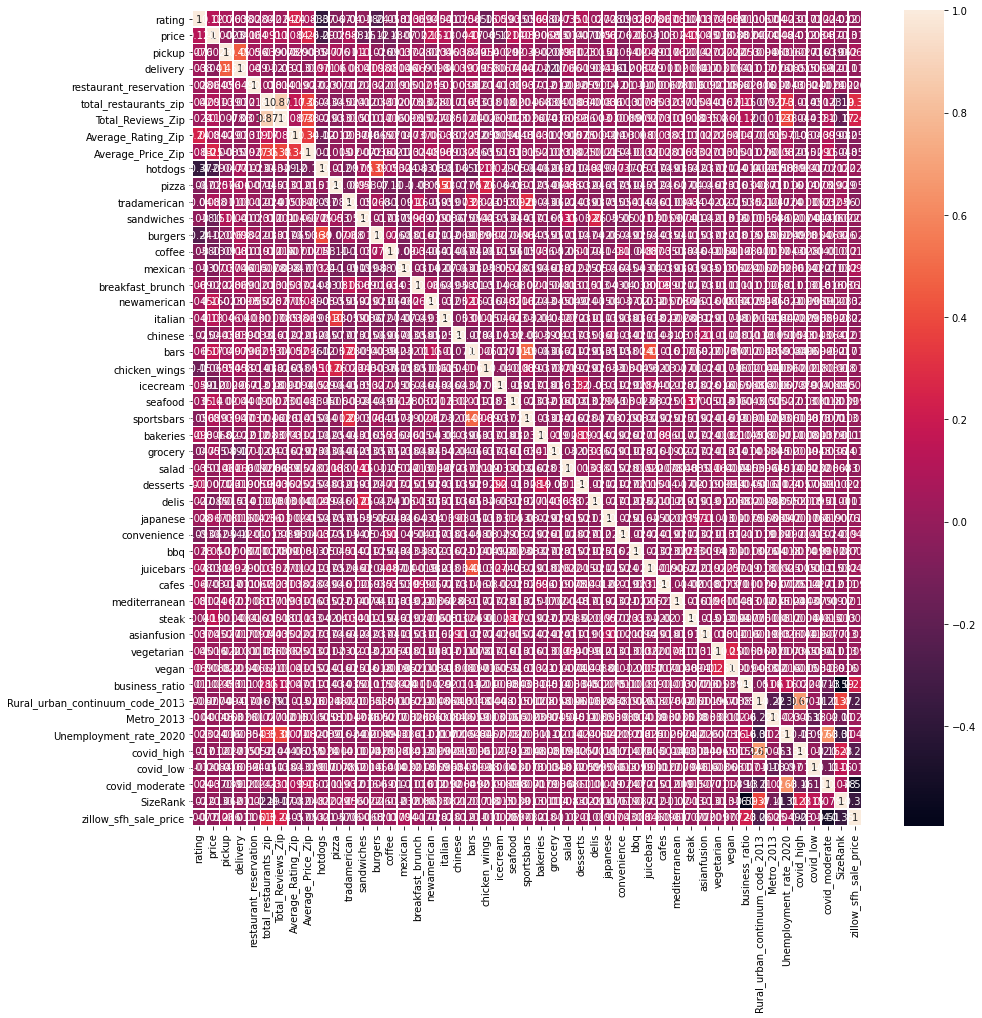

In [34]:
corrMatrix_3 = df_vif_2.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corrMatrix_3, annot=True, linewidths=.5, ax=ax)

In [35]:
corrMatrix_3.to_csv("corr_matrix_full.csv")

In [57]:
#Remove those that are grocery and convenience
df_vif_final=df_vif.drop(columns=['covid_substantial', 'redfin_sale_price','redfin_homes_sold','Urban_influence_code_2013',
                         'Med_HH_Income_Percent_of_State_Total_2019','Median_Household_Income_2019', 'Completeness_pct', 'redfin_days_on_market' 
                        ])
df_vif_final_loc=df_vif_loc.drop(columns=['covid_substantial', 'redfin_sale_price','redfin_homes_sold','Urban_influence_code_2013',
                         'Med_HH_Income_Percent_of_State_Total_2019','Median_Household_Income_2019', 'Completeness_pct', 'redfin_days_on_market' 
                        ])
print(df_vif_final.shape)
df_vif_final1 = df_vif_final[df_vif_final['grocery'] == 0] 
df_vif_final_loc_1 = df_vif_final_loc[df_vif_final_loc['grocery'] == 0] 
print(df_vif_final1.shape)
df_vif_final2 = df_vif_final1[df_vif_final1['convenience'] == 0]
df_vif_final_loc_2 = df_vif_final_loc_1[df_vif_final_loc_1['convenience'] == 0]
print(df_vif_final2.shape)
df_vif_final3=df_vif_final2.drop(columns=['grocery', 'convenience'])
df_vif_final_loc_3=df_vif_final_loc_2.drop(columns=['grocery', 'convenience'])
print(df_vif_final3.shape)

(31714, 50)
(30713, 50)
(29989, 50)
(29989, 48)


In [58]:
#Write to csv
df_vif_final3.to_csv('covid_restaurant_full_post_VIF.csv')
df_vif_final_loc_3.to_csv('covid_restaurant_full_post_VIF_loc.csv')